<a href="https://colab.research.google.com/github/2303A52067/SML_Sru/blob/main/SML_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question1

In [19]:
import pandas as pd
data=pd.read_csv('/content/Salary_Data.csv')
print(data)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [20]:
x = data['YearsExperience']
y = data['Salary']
print(x)
print(y)

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64
0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


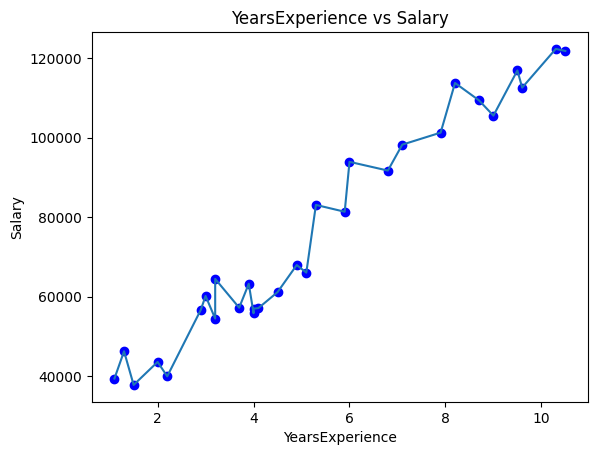

In [21]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.scatter(x, y, color='blue', label='Data points')
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

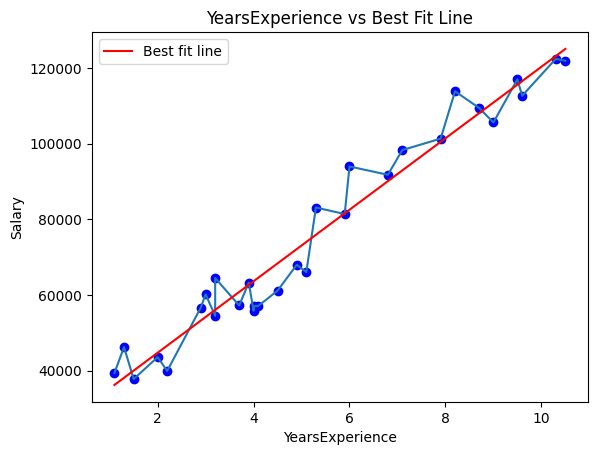

In [25]:
import numpy as np
import matplotlib.pyplot as plt
x_b = np.c_[np.ones((x.shape[0], 1)), x]
theta = np.linalg.solve(x_b.T @ x_b, x_b.T @ y)
m, i = theta[1], theta[0]
plt.plot(x, y)
plt.scatter(x, y, color='blue')
plt.plot(x, m * x + i, color='red', label='Best fit line')
plt.title('YearsExperience vs Best Fit Line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [26]:
x_b = np.c_[np.ones((x.shape[0], 1)), x]
def train_test_split_manual(x_b, y, test_size):
    total_size = len(x_b)
    test_size = int(total_size * test_size)
    x_train, x_test = x_b[:-test_size], x_b[-test_size:]
    y_train, y_test = y[:-test_size], y[-test_size:]
    return x_train, x_test, y_train, y_test
def predict(x, t):
    return x.dot(t)
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
def linear_regression(x_train, y_train):
    return np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
for test_size in [0.2, 0.25]:
    x_train, x_test, y_train, y_test = train_test_split_manual(x_b, y, test_size)
    t = linear_regression(x_train, y_train)
    y_pred_test = predict(x_test, t)
    MSE_value = MSE(y_test, y_pred_test)
    MAE_value = MAE(y_test, y_pred_test)
    print(f"Test size: {int(test_size * 100)}%")
    print(f"MSE: {MSE_value}")
    print(f"MAE: {MAE_value}")


Test size: 20%
MSE: 35766738.23965768
MAE: 5353.262547284988
Test size: 25%
MSE: 25779472.324935675
MAE: 4005.7358729799826


#Question2

In [29]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/Salary_Data.csv')
print(data)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


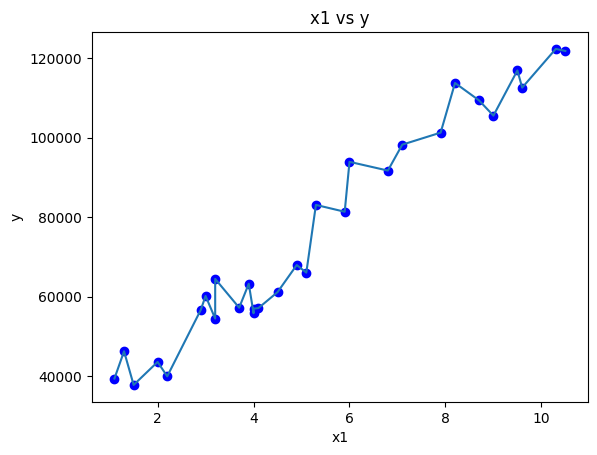

In [30]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.scatter(x, y, color='blue', label='Data points')
plt.title('x1 vs y')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

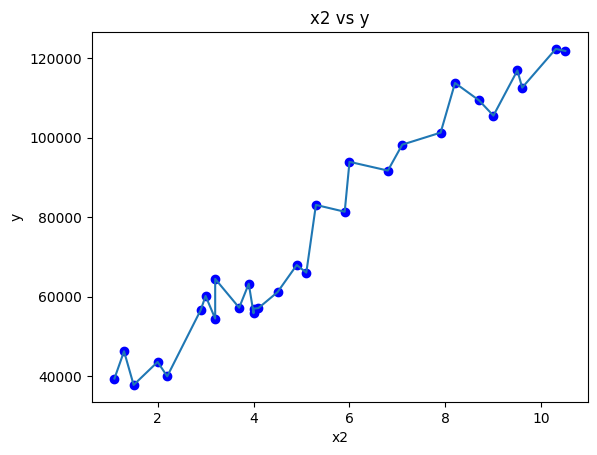

In [31]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.scatter(x, y, color='blue')
plt.title('x2 vs y')
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

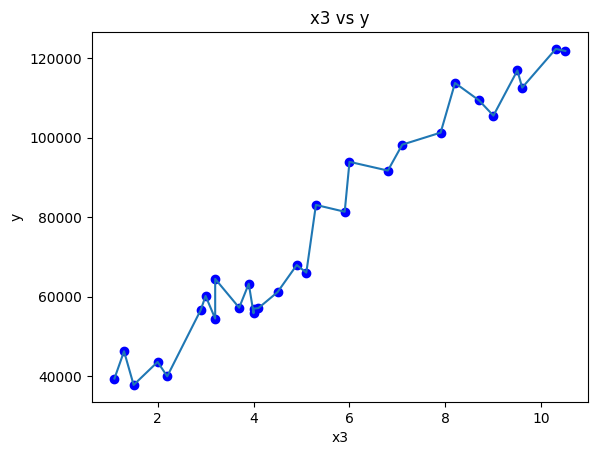

In [32]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.scatter(x, y, color='blue')
plt.title('x3 vs y')
plt.xlabel('x3')
plt.ylabel('y')
plt.show()

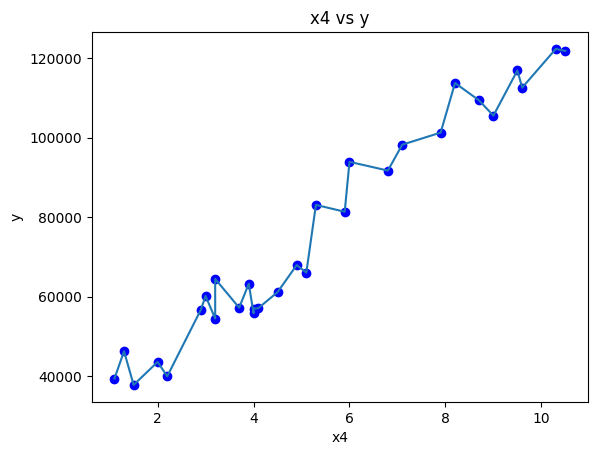

In [33]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.scatter(x, y, color='blue')
plt.title('x4 vs y')
plt.xlabel('x4')
plt.ylabel('y')
plt.show()

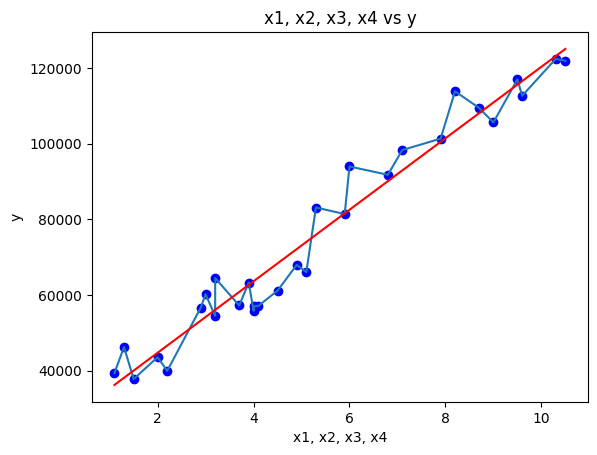

In [34]:
x_b = np.c_[np.ones((x.shape[0], 1)), x]
plt.plot(x,y)
plt.scatter(x, y, color='blue')
plt.plot(x, m * x + i , color='red', label='Best fit line')
plt.title('x1, x2, x3, x4 vs y')
plt.xlabel('x1, x2, x3, x4')
plt.ylabel('y')
plt.show()


In [35]:
x_b = np.c_[np.ones((x.shape[0], 1)), x]
def train_test_split_manual(x_b, y, test_size):
    total_size = len(x_b)
    test_size = int(total_size * test_size)
    x_train, x_test = x_b[:-test_size], x_b[-test_size:]
    y_train, y_test = y[:-test_size], y[-test_size:]
    return x_train, x_test, y_train, y_test
def predict(x, t):
    return x.dot(t)
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
def linear_regression(x_train, y_train):
    return np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
for test_size in [0.2, 0.3]:
    x_train, x_test, y_train, y_test = train_test_split_manual(x_b, y, test_size)
    t = linear_regression(x_train, y_train)
    y_pred_test = predict(x_test, t)
    MSE_value = MSE(y_test, y_pred_test)
    MAE_value = MAE(y_test, y_pred_test)
    print(f"Test size: {int(test_size * 100)}%")
    print(f"MSE: {MSE_value}")
    print(f"MAE: {MAE_value}")


Test size: 20%
MSE: 35766738.23965768
MAE: 5353.262547284988
Test size: 30%
MSE: 23812335.76688838
MAE: 3745.563327835271
